<a href="https://colab.research.google.com/github/Eran707/MSc-Computational-Neuroscience-Repo/blob/master/PumpLeakModel_Figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding the Single Compartment Pump Leak Model

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from Graphing import clcolor, kcolor, xcolor,nacolor
import Class_Single_Compartment_PLM as PLM

The Pump Leak Model (PLM) is coded for in a sepate python module imported as PLM. Here I will discuss the results of the model, rather than the model itself.

## Figure 1B

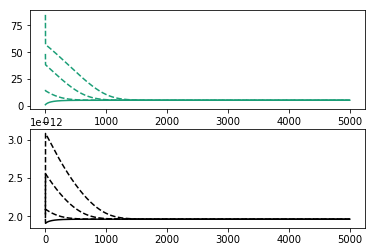

In [0]:
def F1b(init_cl=[1e-3,15e-3,50e-3,90e-3]):
    
    Figure_1 = plt.figure()
    
    Subplot_1 = Figure_1.add_subplot(2,1,1)
    Subplot_2 = Figure_1.add_subplot(2,1,2)
    Subplot_1.set_ylabel = '[Cl-] (mM)'
    Subplot_2.set_ylabel = 'Volume (pL)'
    Subplot_1.set_axis_off
    sns.despine
    
    for i in range(len(init_cl)):
        Fig1B_Sim = PLM.SingleCompartment_PumpLeak()
        Fig1B_Sim.Set_Concentrations(Cl=[init_cl[i],119e-3],K=[0,3.5e-3])
        Fig1B_Sim.Set_LeakConductances()
        Fig1B_Sim.Initialize_Arrays()
        Fig1B_Sim.Set_NaKATPase_Properties(time_off=1000000,time_on=0)
        Fig1B_Sim.Set_KCC2_Properties()
        Fig1B_Sim.Set_Timing(duration = 5000 ,time_step = 1e-3)
        Fig1B_Sim.Simulate_PLM()
        if i ==0:
            Subplot_1.plot(Fig1B_Sim.t_arr,Fig1B_Sim.cl_arr,color=clcolor,ls='solid')
            Subplot_2.plot(Fig1B_Sim.t_arr,Fig1B_Sim.volume_arr,color='k',ls='solid')
        else: 
            Subplot_1.plot(Fig1B_Sim.t_arr,Fig1B_Sim.cl_arr,color=clcolor,ls='--')
            Subplot_2.plot(Fig1B_Sim.t_arr,Fig1B_Sim.volume_arr,color='k',ls='--')
       

F1b()

## Figure 1C


In [0]:
def F1c():
    
      
    Fig1C_Sim = PLM.SingleCompartment_PumpLeak()
    Fig1C_Sim.Set_Concentrations()
    Fig1C_Sim.Set_LeakConductances()
    Fig1C_Sim.Set_NaKATPase_Properties(time_off=3000,time_on=9000,switch_at_start='on')
    Fig1C_Sim.Set_KCC2_Properties()
    Fig1C_Sim.Set_Timing(duration = 12000 ,time_step = 1e-3)
    Fig1C_Sim.Simulate_PLM()
    
    Figure_1C, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, sharex='all')
    
    ax1.plot(Fig1C_Sim.t_arr,Fig1C_Sim.cl_arr,color=clcolor,ls='solid',label='[Cl]')
    ax1.plot(Fig1C_Sim.t_arr,Fig1C_Sim.k_arr,color=kcolor,ls='solid', label='[K]')
    ax1.plot(Fig1C_Sim.t_arr,Fig1C_Sim.na_arr,color=nacolor,ls='solid', label = '[Na]')
    ax1.plot(Fig1C_Sim.t_arr,Fig1C_Sim.x_arr,color=xcolor,ls='solid', label ='[X]')
    ax1.set_ylabel('Concentrations(mM)')
    ax1.legend()
    

    ax2.plot(Fig1C_Sim.t_arr,Fig1C_Sim.e_cl_arr,color=clcolor,ls='solid', label='ECl')
    ax2.plot(Fig1C_Sim.t_arr,Fig1C_Sim.e_k_arr,color=kcolor,ls='solid',label='EK')
    ax2.plot(Fig1C_Sim.t_arr,Fig1C_Sim.vm_arr,color='k',ls='solid', label='Vm')
    ax2.set_ylabel('Voltages (mV)')
    ax2.legend()

    ax3.plot(Fig1C_Sim.t_arr,Fig1C_Sim.volume_arr,color='k',ls='solid', label='Volume')
    ax3.set_ylabel('Volume (pL)')
    ax3.set_xlabel('Time (ms)')
    ax3.legend()
    sns.despine()   

F1c()

## Figure 1D


In [0]:
def F1d(rates=[-7,-3,-1,1]):
        
    na_arr = []
    k_arr =[]
    cl_arr =[]
    x_arr =[]
    vm_arr =[]
    w_arr =[]
    
    
    for i in range(len(rates)):       
                      
        Fig1D_Sim = PLM.SingleCompartment_PumpLeak()
        Fig1D_Sim.Set_Concentrations()
        Fig1D_Sim.Set_LeakConductances()
        Fig1D_Sim.Set_NaKATPase_Properties(ATP_pump_rate = rates[i],time_off=1000000,time_on=0,switch_at_start='on')
        Fig1D_Sim.Set_KCC2_Properties()
        Fig1D_Sim.Set_Timing(duration = 1200 ,time_step = 1e-3)
        Fig1D_Sim.Simulate_PLM()
        na_arr.append(Fig1D_Sim.na_arr[-1]) 
        k_arr.append(Fig1D_Sim.k_arr[-1]) 
        cl_arr.append(Fig1D_Sim.cl_arr[-1]) 
        x_arr.append(Fig1D_Sim.x_arr[-1]) 
        vm_arr.append(Fig1D_Sim.vm_arr[-1]) 
        w_arr.append(Fig1D_Sim.volume_arr[-1]) 
        
    Figure_1D, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, sharex='all')
        
    ax1.plot(rates,cl_arr,color=clcolor,ls='solid',label='[Cl]')
    ax1.plot(rates,k_arr,color=kcolor,ls='solid', label='[K]')
    ax1.plot(rates,na_arr,color=nacolor,ls='solid', label = '[Na]')
    ax1.plot(rates,x_arr,color=xcolor,ls='solid', label ='[X]')
    ax1.set_ylabel('Concentrations(mM)')
    #ax1.legend()
        
    ax2.plot(rates,vm_arr,color='k',ls='solid', label='Vm')
    ax2.set_ylabel('Voltages (mV)')
    #ax2.legend()
    
    ax3.plot(rates,w_arr,color='k',ls='solid', label='Volume')
    ax3.set_ylabel('Volume (pL)')
    ax3.set_xlabel('NA/K ATPase pump rate constant')
    #ax3.legend()
    sns.despine()   